In [1]:
from pypnf import PointFigureChart
import datetime, matplotlib as mpl, numpy as np, pandas as pd, yfinance as yf

pnf = { }

DebugPyPnFCounts = True

symbols = ['SPY', 'IWM']
Today = datetime.date.today().strftime('%Y-%m-%d')  

for symbol in symbols:

    print(f"\n{symbol}\n")
    data = yf.Ticker(symbol)
    ts = data.history(start='2018-01-01', end=Today, period='1d')
 
    # reset index
    ts.reset_index(level=0, inplace=True)

    # convert pd.timestamp to string
    ts['Date'] = ts['Date'].dt.strftime('%Y-%m-%d')

    # select required keys
    ts = ts[['Date','Open','High','Low','Close']]

    # convert DataFrame to dictionary
    ts = ts.to_dict('list')

    pnf = PointFigureChart(ts=ts, method='h/l', reversal=3, boxsize=2, scaling='abs', title=symbol)
    
    if DebugPyPnFCounts is True: 

        pnf.show_breakouts = True
        pnf.show_counts = True
        pnf.get_counts()

        dfPnFBreakouts = pd.DataFrame.from_dict(pnf.breakouts)
        display(dfPnFBreakouts)

        dfPnFCounts = pd.DataFrame.from_dict(pnf.counts)
        display(dfPnFCounts[['trend','box index', 'length', 'type','target', 'reward', 'risk 1', 'risk 2']])

        print(pnf.ts['date'])
        print(pnf.time_step)

        print(pnf)

    else:

        pnf.get_trendlines(length=4, mode='weak')
        pnf.show_trendlines = 'external'

        pnf.show()




SPY



,date,ts index,trend,type,column index,box index,hits,width,outer width
0,2018-02-09,27,-1,conti,3,116,2,3,4
1,2018-02-26,37,1,reversal,4,123,2,3,4
2,2018-03-13,48,1,reversal,6,126,2,3,6
3,2018-03-23,56,-1,reversal,7,118,2,3,4
4,2018-04-02,61,-1,reversal,9,116,2,3,6
...,...,...,...,...,...,...,...,...,...
297,2024-07-31,1654,1,reversal,340,274,2,3,4
298,2024-08-05,1657,-1,reversal,341,258,2,11,12
299,2024-08-02,1656,-1,reversal,341,268,2,5,10
300,2024-08-02,1656,-1,resistance,341,269,2,3,5


,trend,box index,length,type,target,reward,risk 1,risk 2
0,-1,116,3,vertical,190.0,42.0,14.0,24.0
1,1,126,3,vertical,294.0,42.0,16.0,24.0
2,-1,116,3,vertical,198.0,34.0,10.0,20.0
3,1,121,3,vertical,260.0,18.0,10.0,12.0
4,1,127,3,vertical,288.0,34.0,12.0,20.0
...,...,...,...,...,...,...,...,...
250,1,255,6,horizontal R>1,532.0,22.0,14.0,16.0
251,1,260,8,horizontal R>1,542.0,22.0,24.0,28.0
252,-1,271,6,horizontal R>1,528.0,14.0,16.0,24.0
253,-1,258,12,horizontal R>1,492.0,24.0,40.0,50.0


['2018-01-02' '2018-01-03' '2018-01-04' ... '2024-08-14' '2024-08-15'
 '2024-08-16']
D
Point & Figure (abs|h/l) 2 x 3 | SPY
---  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  ---
564  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  X  .  .  .  .  .  .  .  .  .  .  564
562  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  X  O  .  .  .  .  .  .  .  .  .  562
560  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  X  O  .  .  .  .  .  .  .  .  .  560
558  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  X  O  .  .  .  .  .  .  .  .  .  558
556  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  X  O  X  .  .  .  .  .  .  .  .  556
554  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  X  O  X  O  .  .  X  .  .  .  X  554
552  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  X  O  X  O  .  .  X  O  .  .  X  552
550  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  X  .  X  O  X  O  .  .  X  O

IndexError: index 361 is out of bounds for axis 0 with size 340

I started to explore @swaschke's implementation and found 'IWM' ticker data from 2018-01-01 to present is real example repro of above reversal > 1 bug. 
"IndexError: "index 361 is out of bounds for axis 0 with size 340".

Below is an example of expected output as a graph (vs text), see permalink: https://schrts.co/uVUybmPw

![Screenshot 2024-09-08 at 1.51.14 PM.png](<attachment:Screenshot 2024-09-08 at 1.51.14 PM.png>)
![Screenshot 2024-09-08 at 1.57.50 PM.png](<attachment:Screenshot 2024-09-08 at 1.57.50 PM.png>)
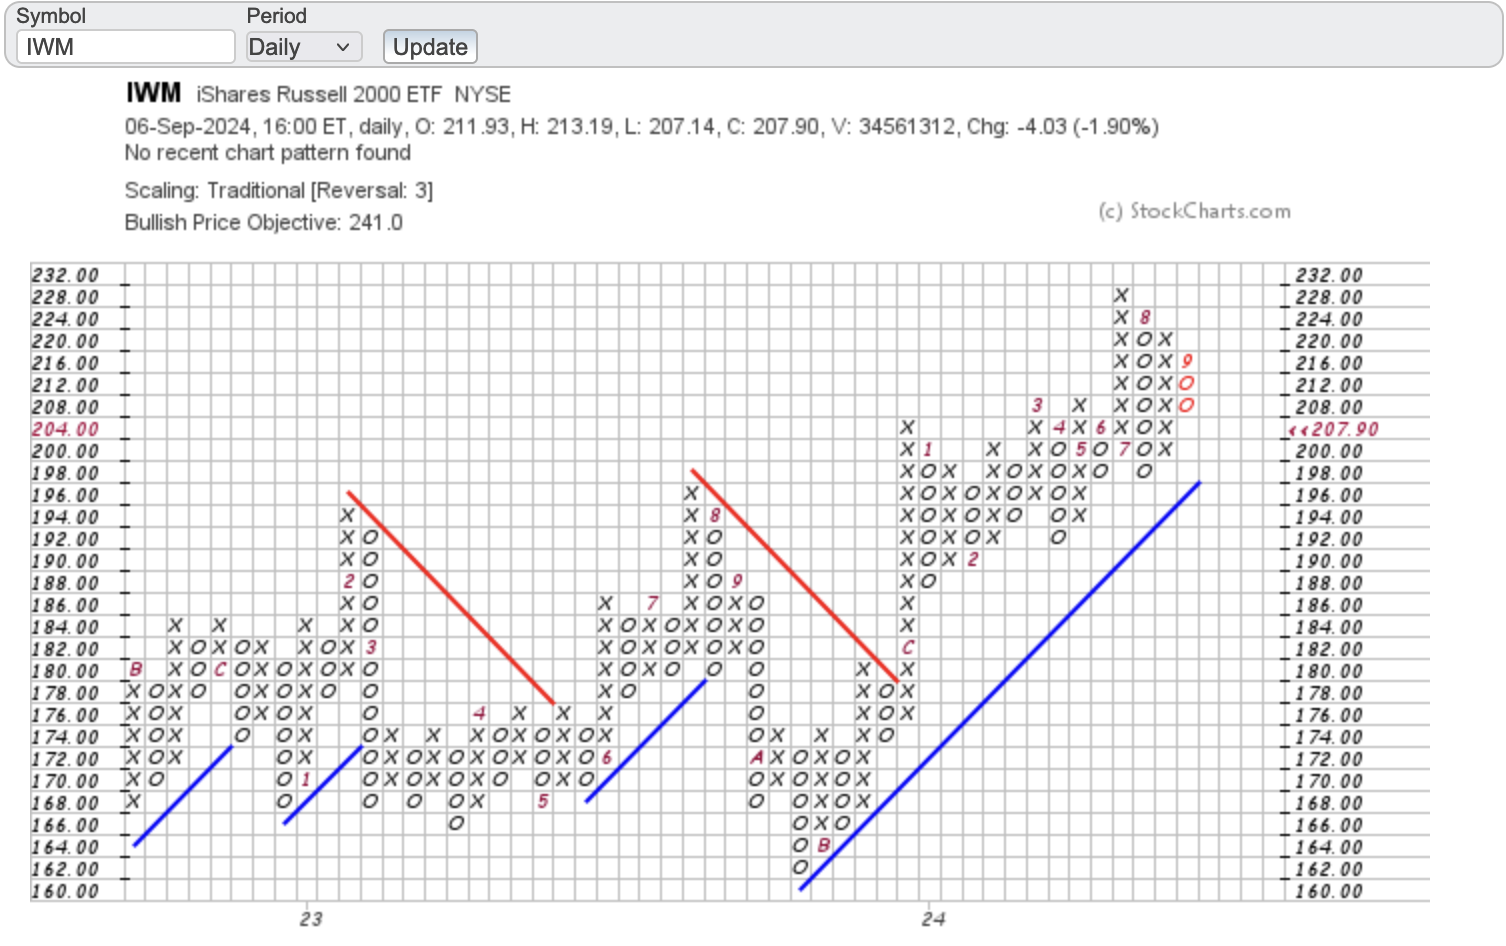
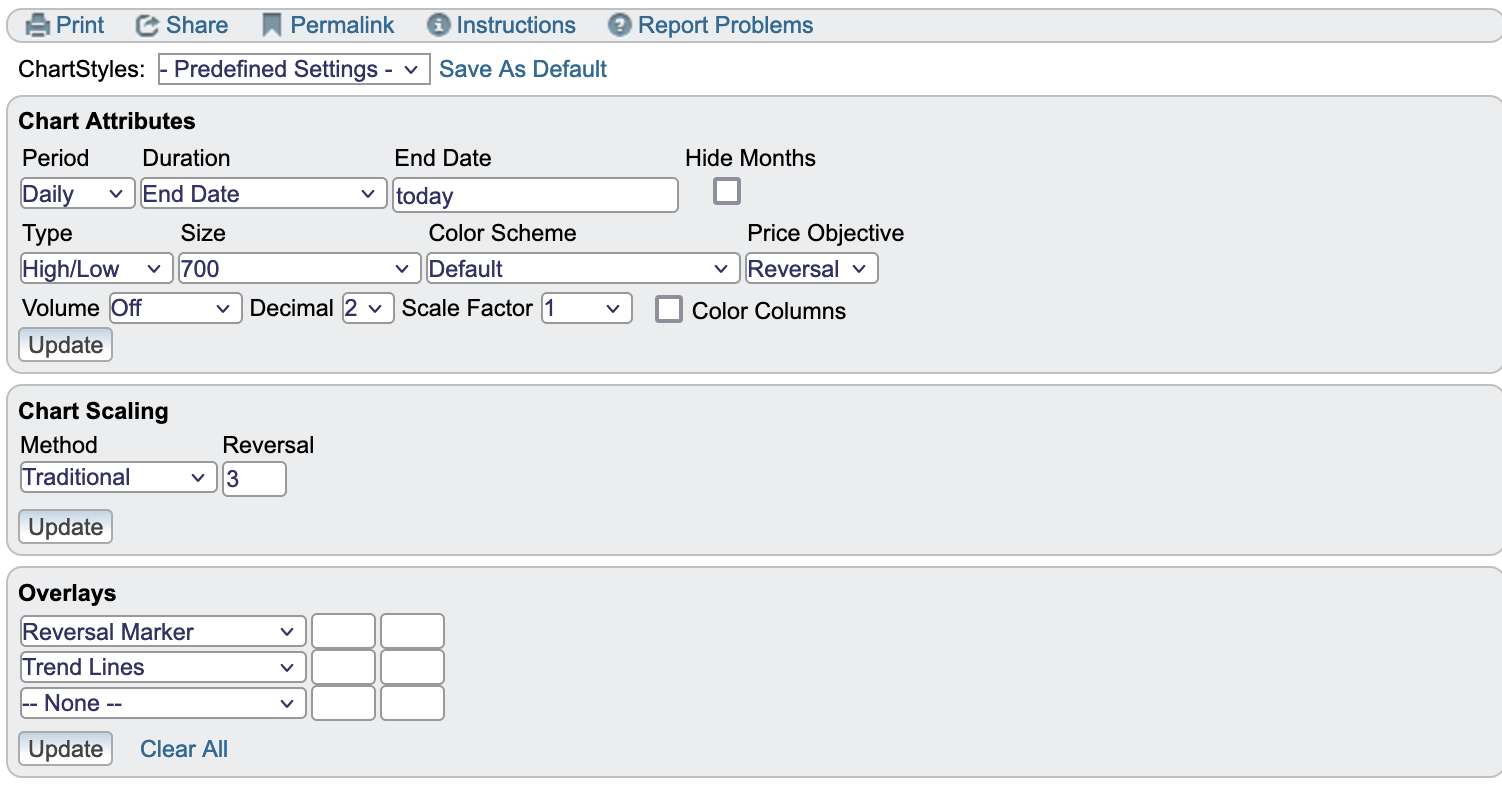